HW #1 | By 6288156 Sirada Vitoonvarakorn


For this homework, you are to practice python programming, clean the data, perform 
exploratory data analysis, and visualize the data. You are to continue your selected open dataset 
from the workshop of your group. You are to compete your Jupyter notebook to load and analyze 
your group data. You may use your group’s notebook to clean the data or you can try to do it all 
again yourself. Please describe how you, or your group, clean the data using the markup tab in 
the Jupyter notebook before you take the action. Then, after the data is cleaned, you are to 
analyze the dataset to find the following information.


1) The mean and stand deviation of the data, or the frequency counts, where they are appropriated.


2) Create at least 2 plots related to your data. You can pick the plots that you are interested in.


3) Find one additional insight from the data that was not included in the group work.


Note that, you must show how you come to your conclusion. (For example, you can
explain what you observed from the plots to support your finding.)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#Show graphs withint Python notebook
from ast import literal_eval
from tqdm import tqdm_notebook
from collections import Counter
import re

import matplotlib.pyplot as plt
import seaborn as sns

Dataset: Highway Travel 2563

Link: https://data.go.th/en/dataset/highwaystravel2563

The open dataset that I have inherited from the group's selected notebook is the dataset that contains the information about the total amount of highway 
travel in Thailand from around year 2020. The variables contained in the dataset mostly includes the Highway Number, Types of Cars from big to small, as well as the Province hence the cars are from. 

In [4]:
df = pd.read_csv('data/road.csv')
df.columns #list columns' names

Index(['หมายเลขทางหลวง', 'หมายเลขตอนควบคุม', 'ชื่อตอน',
       'รถยนต์นั่งไม่เกิน 7 คน', 'รถยนต์นั่งเกิน  7 คน', 'รถโดยสารขนาดเล็ก',
       'รถโดยสารขนาดกลาง', 'รถโดยสารขนาดใหญ่', 'รถบรรทุกขนาดเล็ก',
       'รถบรรทุกขนาดกลาง', 'รถบรรทุกขนาดใหญ่', 'รถบรรทุกพ่วง',
       'รถบรรทุกกึ่งพ่วง', 'รวม', 'รถจักรยานยนต์', 'จังหวัด'],
      dtype='object')

In [5]:
df.head(10) #view the sample data from the header

,หมายเลขทางหลวง,หมายเลขตอนควบคุม,ชื่อตอน,รถยนต์นั่งไม่เกิน 7 คน,รถยนต์นั่งเกิน 7 คน,รถโดยสารขนาดเล็ก,รถโดยสารขนาดกลาง,รถโดยสารขนาดใหญ่,รถบรรทุกขนาดเล็ก,รถบรรทุกขนาดกลาง,รถบรรทุกขนาดใหญ่,รถบรรทุกพ่วง,รถบรรทุกกึ่งพ่วง,รวม,รถจักรยานยนต์,จังหวัด
0,1,101,อนุสาวรีย์หลักสี่ - สะพานใหม่,6249384,2450282,145854,228308,415881,2211134,235535,58145,19053,30879,1.204446e+07,3100055,กรุงเทพมหานคร
1,1,102,แยก คปอ. - สนามกีฬาธูปะเตมีย์,20900718,8194830,487801,763562,1390891,7395013,787732,194461,63722,103273,4.028200e+07,10367960,กรุงเทพมหานคร
2,1,201,สนามกีฬาธูปะเตมีย์ - ต่างระดับคลองหลวง,740924709,172610044,85107915,20080902,56789434,287132586,43042278,19009481,5563148,4133213,1.434394e+09,78102470,ปทุมธานี
3,1,202,ต่างระดับคลองหลวง - ประตูน้ำพระอินทร์,415404858,178351520,17360203,29404721,49137329,253823949,84643858,16064037,11562550,7421370,1.063174e+09,64237430,ปทุมธานี
4,1,300,ประตูน้ำพระอินทร์ - หนองแค,350458648,208314859,82341810,21061646,33125217,169515001,160725261,107252688,106330063,95585945,1.334711e+09,15317561,พระนครศรีอยุธยา
5,1,401,หนองแค - หินกอง,192830960,183965840,4531840,8100080,18185760,218118160,23295760,26040560,37568720,32645600,7.452833e+08,13712320,สระบุรี
6,1,402,หินกอง - ปากข้าวสาร,96415480,91982920,2265920,4050040,9092880,109059080,11647880,13020280,18784360,16322800,3.726416e+08,6856160,สระบุรี
7,1,403,ปากข้าวสาร - แยกสวนพฤกษศาสตร์พุแค,106186223,110169247,14576658,11350863,12229248,47167794,18317370,21149406,47614560,52279090,4.410405e+08,17317827,สระบุรี
8,1,404,แยกสวนพฤกษศาสตร์พุแค - แยกโรงเรียนสุธีวิทยา,44636276,36323933,12178082,16980212,12178082,31461714,23850413,16704803,20400290,18787896,2.335017e+08,25778275,สระบุรี
9,1,501,แยกโรงเรียนสุธีวิทยา - ดงจำปา,29499519,30826586,5572966,3895353,1727691,7125384,4120704,4417595,6324136,4410441,9.792038e+07,6849955,สระบุรี


In [6]:
#List the types of all columns
df.dtypes

หมายเลขทางหลวง              int64
หมายเลขตอนควบคุม            int64
ชื่อตอน                    object
รถยนต์นั่งไม่เกิน 7 คน      int64
รถยนต์นั่งเกิน  7 คน        int64
รถโดยสารขนาดเล็ก            int64
รถโดยสารขนาดกลาง            int64
รถโดยสารขนาดใหญ่            int64
รถบรรทุกขนาดเล็ก            int64
รถบรรทุกขนาดกลาง            int64
รถบรรทุกขนาดใหญ่            int64
รถบรรทุกพ่วง                int64
รถบรรทุกกึ่งพ่วง            int64
รวม                       float64
รถจักรยานยนต์               int64
จังหวัด                    object
dtype: object

In this dataset, me and everyone in the group basically cleans the dataset by first checking whether the dataset has any NaN contained in the dataset. Since the whole dataset has already been filled we do not need to do extra step further in order to erase the NaN values. However, I decided to drop some columns that may not be used while plotting the visualization such as the locations (ชื่อตอน) which may be deemed unnecessary to cast the data into values from too much variety of places alone. I also use the options display format code to suppress scientific notation for easier to read as well. 

In [7]:
df.isnull().sum() #check for NaN values

หมายเลขทางหลวง            0
หมายเลขตอนควบคุม          0
ชื่อตอน                   0
รถยนต์นั่งไม่เกิน 7 คน    0
รถยนต์นั่งเกิน  7 คน      0
รถโดยสารขนาดเล็ก          0
รถโดยสารขนาดกลาง          0
รถโดยสารขนาดใหญ่          0
รถบรรทุกขนาดเล็ก          0
รถบรรทุกขนาดกลาง          0
รถบรรทุกขนาดใหญ่          0
รถบรรทุกพ่วง              0
รถบรรทุกกึ่งพ่วง          0
รวม                       0
รถจักรยานยนต์             0
จังหวัด                   0
dtype: int64

In [8]:
df = df.drop(['ชื่อตอน'], axis = 1) #drop columns 

In [9]:
#Output basic statistics for the numeric columns
#Before
df.describe() 

,หมายเลขทางหลวง,หมายเลขตอนควบคุม,รถยนต์นั่งไม่เกิน 7 คน,รถยนต์นั่งเกิน 7 คน,รถโดยสารขนาดเล็ก,รถโดยสารขนาดกลาง,รถโดยสารขนาดใหญ่,รถบรรทุกขนาดเล็ก,รถบรรทุกขนาดกลาง,รถบรรทุกขนาดใหญ่,รถบรรทุกพ่วง,รถบรรทุกกึ่งพ่วง,รวม,รถจักรยานยนต์
count,2687.000000,2687.000000,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03,2.687000e+03
mean,1920.870115,178.295497,2.974835e+07,1.585658e+07,1.894947e+06,1.259029e+06,1.443662e+06,2.376840e+07,4.868070e+06,3.806726e+06,3.320173e+06,2.742462e+06,8.870840e+07,1.635950e+07
std,1470.112405,179.101696,5.830398e+07,3.061389e+07,6.030315e+06,4.195829e+06,4.688714e+06,4.189414e+07,1.265978e+07,1.015850e+07,8.498016e+06,8.266580e+06,1.574100e+08,2.394026e+07
min,1.000000,100.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,323.000000,100.000000,3.475178e+06,1.315786e+06,4.220250e+04,9.093500e+03,3.263000e+03,2.884714e+06,3.823290e+05,1.658110e+05,6.640750e+04,2.133500e+04,1.198970e+07,3.300828e+06
50%,2083.000000,101.000000,1.216633e+07,5.445426e+06,3.106350e+05,1.264910e+05,1.162710e+05,1.036869e+07,1.507669e+06,8.475960e+05,5.634870e+05,3.399060e+05,3.853305e+07,9.381738e+06
75%,3279.000000,200.000000,3.202119e+07,1.791477e+07,1.168353e+06,7.411135e+05,7.995725e+05,2.679048e+07,4.518067e+06,3.266404e+06,2.698420e+06,1.802394e+06,1.029791e+08,1.944399e+07
max,4373.000000,1500.000000,9.002389e+08,4.561058e+08,1.070980e+08,6.505284e+07,6.897785e+07,6.228196e+08,3.734644e+08,2.721330e+08,1.228549e+08,1.257699e+08,2.857295e+09,4.316306e+08


In [10]:
pd.options.display.float_format = '{:.5f}'.format #chage display format to suppress scientific notation like e+03

In [11]:
#After
df.describe() 

,หมายเลขทางหลวง,หมายเลขตอนควบคุม,รถยนต์นั่งไม่เกิน 7 คน,รถยนต์นั่งเกิน 7 คน,รถโดยสารขนาดเล็ก,รถโดยสารขนาดกลาง,รถโดยสารขนาดใหญ่,รถบรรทุกขนาดเล็ก,รถบรรทุกขนาดกลาง,รถบรรทุกขนาดใหญ่,รถบรรทุกพ่วง,รถบรรทุกกึ่งพ่วง,รวม,รถจักรยานยนต์
count,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000,2687.00000
mean,1920.87012,178.29550,29748349.22851,15856581.62263,1894947.42538,1259029.21176,1443661.75847,23768404.64868,4868069.98325,3806725.52661,3320172.67845,2742462.23521,88708404.31936,16359498.33792
std,1470.11240,179.10170,58303982.67280,30613893.84520,6030315.37128,4195828.53058,4688714.02954,41894143.27096,12659780.88010,10158500.04122,8498015.67898,8266579.75524,157410032.50877,23940259.85379
min,1.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,323.00000,100.00000,3475178.00000,1315786.00000,42202.50000,9093.50000,3263.00000,2884713.50000,382329.00000,165811.00000,66407.50000,21335.00000,11989702.50000,3300827.50000
50%,2083.00000,101.00000,12166326.00000,5445426.00000,310635.00000,126491.00000,116271.00000,10368689.00000,1507669.00000,847596.00000,563487.00000,339906.00000,38533050.00000,9381738.00000
75%,3279.00000,200.00000,32021193.50000,17914769.50000,1168353.00000,741113.50000,799572.50000,26790485.00000,4518067.00000,3266404.50000,2698420.00000,1802394.00000,102979065.50000,19443991.00000
max,4373.00000,1500.00000,900238920.00000,456105825.00000,107097966.00000,65052841.00000,68977850.00000,622819575.00000,373464350.00000,272133050.00000,122854890.00000,125769875.00000,2857294825.00000,431630568.00000


In [12]:
#1) The mean and stand deviation of the data, or the frequency counts, where they are appropriated.
df.mean() #mean

หมายเลขทางหลวง               1920.87012
หมายเลขตอนควบคุม              178.29550
รถยนต์นั่งไม่เกิน 7 คน   29748349.22851
รถยนต์นั่งเกิน  7 คน     15856581.62263
รถโดยสารขนาดเล็ก          1894947.42538
รถโดยสารขนาดกลาง          1259029.21176
รถโดยสารขนาดใหญ่          1443661.75847
รถบรรทุกขนาดเล็ก         23768404.64868
รถบรรทุกขนาดกลาง          4868069.98325
รถบรรทุกขนาดใหญ่          3806725.52661
รถบรรทุกพ่วง              3320172.67845
รถบรรทุกกึ่งพ่วง          2742462.23521
รวม                      88708404.31936
รถจักรยานยนต์            16359498.33792
dtype: float64

In [13]:
df.std() #standard deviation

หมายเลขทางหลวง                1470.11240
หมายเลขตอนควบคุม               179.10170
รถยนต์นั่งไม่เกิน 7 คน    58303982.67280
รถยนต์นั่งเกิน  7 คน      30613893.84520
รถโดยสารขนาดเล็ก           6030315.37128
รถโดยสารขนาดกลาง           4195828.53058
รถโดยสารขนาดใหญ่           4688714.02954
รถบรรทุกขนาดเล็ก          41894143.27096
รถบรรทุกขนาดกลาง          12659780.88010
รถบรรทุกขนาดใหญ่          10158500.04122
รถบรรทุกพ่วง               8498015.67898
รถบรรทุกกึ่งพ่วง           8266579.75524
รวม                      157410032.50877
รถจักรยานยนต์             23940259.85379
dtype: float64

In [14]:
df['หมายเลขทางหลวง'].value_counts() #frequency counts #for most frequent highway numbers traveled

4       43
1       40
12      27
2       21
3       20
        ..
4345     1
2298     1
4347     1
2300     1
2049     1
Name: หมายเลขทางหลวง, Length: 1527, dtype: int64

In [18]:
df['จังหวัด'].value_counts() #frequency counts #for cars that has the most frequent labeled provinces 

4       43
1       40
12      27
2       21
3       20
        ..
4345     1
2298     1
4347     1
2300     1
2049     1
Name: หมายเลขทางหลวง, Length: 1527, dtype: int64

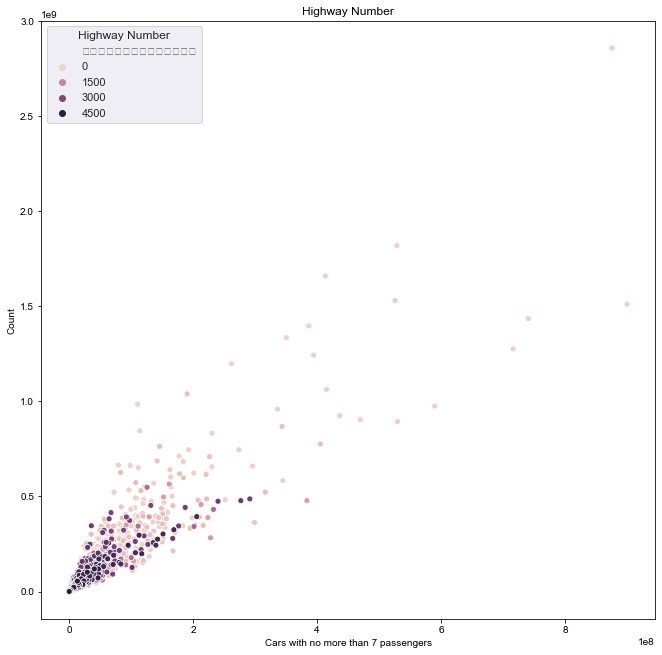

In [16]:
#2) Create at least 2 plots related to your data. You can pick the plots that you are interested in.
plt.subplots(figsize=(11, 11))
sns.set(font_scale=1)
ax = sns.scatterplot(x="รถยนต์นั่งไม่เกิน 7 คน", y="รวม", hue='หมายเลขทางหลวง', data=df)
ax.set(xlabel='Cars with no more than 7 passengers', ylabel='Count', title='Highway Number')
plt.legend(title = "Highway Number")
plt.show()

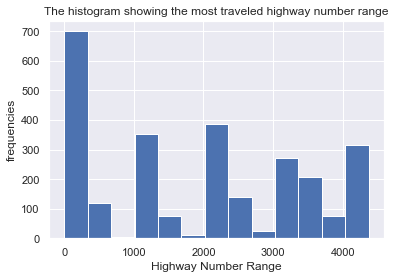

In [21]:
plt.hist(df.หมายเลขทางหลวง, bins='auto') 
plt.title("The histogram showing the most traveled highway number range")
plt.xlabel('Highway Number Range')
plt.ylabel('frequencies')
plt.show()

#3) Find one additional insight from the data that was not included in the group work.

From my observation at the plots as well as doing some further study and testing with various variables, I came into the conclusion that no matter the different type of the cars, the highway number ranging from 0-1000 still retains the most traveled highway road number that the cars has traveled from. With the frequency from all the numbers counted in the range is estimated to be around 700 as well as having the highest correlation no matter which type of cars is being used for the test. 